# Learning Agenda of this Notebook:
- What is Pandas and how is it used in AI?
- Key features of Pandas
- Data Types in Pandas
- What does Pandas deal with?

- Creating Series in Pandas
    - From Python List
    - From NumPy Arrays
    - From Python Dictionary
    - From a scalar value
    - Creating empty series object
- Attributes of a Pandas Series
- Arithmetic Operations on Series

- Dataframes in Pandas
    - Anatomy of a Dataframe
    - Creating Dataframe
        - An empty dataframe
        - Two-Dimensional NumPy Array
        - Dictionary of Python Lists
        - Dictionary of Panda Series
    - Attributes of a Dataframe
    - Bonus
- Different file formats in Pandas 
- Indexing, Subsetting and Slicing Dataframes
    - Practice Exercise I
- Modifying Dataframes
- Data Handling with Pandas
  - Practice Exercise I
  - Practice Exercise II
- All Statistical functions in Pandas
- Input/Output Operations
- Aggregation & Grouping
  - Practice Exercise
- Merging, Joining and Concatenation
  - Practice Exercise
- How To Perform Data Visualization with Pandas
- Exercise I
- Exercise II
- Pandas's Assignment

## Outline
1. Modifying Column labels of Dataframe
2. Modifying Row indices of Dataframe
3. Modifying Row(s) Data (Records) of a Dataframe
   - Modifying a single Row
   - Modifying multiple Rows
       - `map()` Method
       - `df.remove()` Method
       - `df.apply()` Method
       - `df.replace()` Method
4. Add a New Column in a Dataframe
5. Delete an Existing Column from a Dataframe
6. Add a New Row in  a Dataframe
7. Delete an Existing Row(s) from a Dataframe
8. Adding a New Column with Conditional Values
9. Deleting Row(s) Based on Specific Condition
10. Delete a Column  Based on Specific Condition
11. Change Datatype of a Pandas Series
12. Sorting dataframes using `df.sort_values()`
13. Sorting dataframes using `df.sort_index()`
14. Practice Exercise

### Read a Sample File

In [2]:
import numpy as np
import pandas as pd

In [3]:
!cat datasets/groupdata.csv

roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000
2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000
3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500
4,Aisha,20,Lahore,MOR,group A,Male,82,84.3,4000
5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500
6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,
7,Omar,12,Sialkot,AFT,group B,Female,90.2,,4000
8,Adeen,4,Multan,MORNING,group D,Male,84.1,76,8000
9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500
10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800
11,Hussein,12,Islamabad,MOR,group B,Male,90.5,81.3,6000
12,Muskan,20,Karachi,AFTERNOON,group C,Male,90.5,81.3,
13,Yusuf,18,Lahore,MORNING,group D,Male,,76.5,7000
14,Amina,28,Multan,AFTERNOON,group A,Female,84.1,76,8000
15,Khubaib,13,Sialkot,AFT,group C,Female,90.5,81.3,3500
16,Dua,11,Multan,AFTERNOON,group A,Male,90.5,81.3,3800


In [4]:
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


In [5]:
df.tail(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
13,14,Amina,28,Multan,AFTERNOON,group A,Female,84.1,76.0,8000.0
14,15,Khubaib,13,Sialkot,AFT,group C,Female,90.5,81.3,3500.0
15,16,Dua,11,Multan,AFTERNOON,group A,Male,90.5,81.3,3800.0


In [6]:
# df.shape
# df.columns
# df.dtypes
# df.index
# df.describe(include='all')
# df.info()
# df.sample(3)
# df.isnull().sum() # or df.isna().sum()
# df.nunique()
# df['address'].value_counts()

### 1. Modifying Column Names of a Dataframe
- Convert Columns into lowercase
- Convert Columns into uppercase
- Remove spaces from Columns
- Rename Columns using `rename()`

In [7]:
df.columns

Index(['roll no', 'name', 'age', 'address', 'session', 'group', 'gender',
       'subj1', 'subj2', 'scholarship'],
      dtype='object')

##### Revision of str.upper()

In [8]:
str1 = "ehtisham"
str1

'ehtisham'

In [11]:
# print(dir(str1))
str1.upper()

'EHTISHAM'

In [12]:
df.columns.str.upper()

Index(['ROLL NO', 'NAME', 'AGE', 'ADDRESS', 'SESSION', 'GROUP', 'GENDER',
       'SUBJ1', 'SUBJ2', 'SCHOLARSHIP'],
      dtype='object')

In [13]:
df.columns = df.columns.str.upper()
df.columns

Index(['ROLL NO', 'NAME', 'AGE', 'ADDRESS', 'SESSION', 'GROUP', 'GENDER',
       'SUBJ1', 'SUBJ2', 'SCHOLARSHIP'],
      dtype='object')

In [14]:
df.head()

,ROLL NO,NAME,AGE,ADDRESS,SESSION,GROUP,GENDER,SUBJ1,SUBJ2,SCHOLARSHIP
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [15]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('-','_')

In [16]:
df.columns

Index(['ROLL_NO', 'NAME', 'AGE', 'ADDRESS', 'SESSION', 'GROUP', 'GENDER',
       'SUBJ1', 'SUBJ2', 'SCHOLARSHIP'],
      dtype='object')

In [17]:
df.head()

,ROLL_NO,NAME,AGE,ADDRESS,SESSION,GROUP,GENDER,SUBJ1,SUBJ2,SCHOLARSHIP
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


> **Question: How to rename columns while reading data and after loaded data?**

In [18]:
# df.rename(columns={'SUBJ1':'SUBJECT1'} ) # after loading data
# pd.read_csv('datasets/groupdata.csv', names=['SUBJ1']) # before loading data

### 2. Modifying the Row Indices of a DataFrame
- df.set_index('id')
- df.reset_index(drop=True)

In [19]:
df.set_index('ROLL_NO')

,NAME,AGE,ADDRESS,SESSION,GROUP,GENDER,SUBJ1,SUBJ2,SCHOLARSHIP
ROLL_NO,,,,,,,,,
1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0


In [20]:
df.set_index('ROLL_NO', inplace=True)

In [21]:
df

,NAME,AGE,ADDRESS,SESSION,GROUP,GENDER,SUBJ1,SUBJ2,SCHOLARSHIP
ROLL_NO,,,,,,,,,
1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0


In [22]:
df.reset_index(inplace=True)
df

,ROLL_NO,NAME,AGE,ADDRESS,SESSION,GROUP,GENDER,SUBJ1,SUBJ2,SCHOLARSHIP
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


### 3. Modifying Data of a Single Row/Record of a Dataframe

In [23]:
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


####   Get the row/record you want to modify
Let us suppose we want to change the `subj1` and `subj2` marks of `Ayesha`

In [25]:
# First Method
# Returns a Series object
df.loc[1,:]

roll no                2
name              Ayesha
age                   16
address        Islamabad
session              AFT
group            group A
gender              Male
subj1               70.5
subj2               60.5
scholarship       6000.0
Name: 1, dtype: object

In [26]:
# Second Method
df.name # df['name']

0     Ehtisham
1       Ayesha
2          Ali
3        Aisha
4        Ahmed
5      Khadija
6         Omar
7        Adeen
8       Zainab
9       Hassan
10     Hussein
11      Muskan
12       Yusuf
13       Amina
14     Khubaib
15         Dua
Name: name, dtype: object

In [27]:
df.name == 'Ayesha'

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: name, dtype: bool

In [28]:
# Returns a Dataframe object
df.loc[df.name=='Ayesha', :]

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0


##### Option 1:
- One way is to pass a new list of values and assign it to the appropriate series (row)

In [29]:
# Any of the following two LOC will work
# 1st Method
df.loc[1,:] = ['2', 'Ayesha', 16, 'Islamabad', 'AFT', 'group A', 'Female', 99, 99, 6000.0]

/var/folders/qb/lf_2q09x7wj115gvfnkv6tkm0000gn/T/ipykernel_21709/662866733.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[1,:] = ['2', 'Ayesha', 16, 'Islamabad', 'AFT', 'group A', 'Female', 99, 99, 6000.0]


In [30]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Female,99.0,99.0,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


In [31]:
# 2nd Method
df.loc[df.name=='Ayesha', :] = ['2', 'Ayesha', 16, 'Islamabad', 'AFT', 'group A', 'Female', 90, 91, 6000.0]

In [32]:
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Female,90.0,91.0,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


##### Option 2:
- A better way is to assign only those two values that we want to change instead of assigning the complete list of values in that row

In [33]:
# Returns a series
df = pd.read_csv('datasets/groupdata.csv')
df.loc[1,:]

roll no                2
name              Ayesha
age                   16
address        Islamabad
session              AFT
group            group A
gender              Male
subj1               70.5
subj2               60.5
scholarship       6000.0
Name: 1, dtype: object

In [34]:
df.loc[1, ['subj1', 'subj2']] 

subj1    70.5
subj2    60.5
Name: 1, dtype: object

In [35]:
# Returns a dataframe
df.loc[df.name=='Ayesha', ['subj1', 'subj2']]

,subj1,subj2
1,70.5,60.5


In [ ]:
# 1st Method
df.loc[1, ['subj1', 'subj2']] = [100, 90]

In [36]:
# 2nd Method
df.loc[df.name=='Ayesha', ['subj1', 'subj2']] = [100, 100]

In [37]:
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,100.0,100.0,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


**Note: You can also use `df.iloc[]` method instead of `df.loc[]` to change multiple or single value of a row. Other than these two you may also try using `df.at[]` method to change a single value of a row.**
```
df.loc[filter, 'column(s)'] = 'value(s)'
```

##  Modify Data of Multiple Rows and 
- Uptill now we have learnt to modify a single, multiple or all the values of a single row in a dataframe.
- What if we want to modify multiple rows at a time?
- The following methods will come for your rescue:
    - `map()`
    - `df.replace()`
    - `df.apply()`
    - `df.applymap()`

#### a. The Python Built-in `map()` Method
- The ```map(aFunction, *iterables)``` function simply returns a map object after applying  `aFunction()` to all the elements of `iterable(s)`. 
- Later you can type cast the map object to appropriate data structure
- The original iterable(s) remains unchanged. 

In [2]:
list1 = [3,4,5,6,7,78,76,56]
print(list1)

[3, 4, 5, 6, 7, 78, 76, 56]


In [3]:
# Function to check if a number is even then return square of that number, 
# else return cube of that number
list1 = [3,4,5,6,7,78,76,56]

def return_square_cube(x):
    if x%2==0:
        return x**2
    else:
        return x**3
    
obj1 = map(return_square_cube, list1)
print(type(obj1))
print(list(obj1))

<class 'map'>
[27, 16, 125, 36, 343, 6084, 5776, 3136]


**Example:** Using built-in function with `map()`

In [4]:
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


In [5]:
df['name']

0     Ehtisham
1       Ayesha
2          Ali
3        Aisha
4        Ahmed
5      Khadija
6         Omar
7        Adeen
8       Zainab
9       Hassan
10     Hussein
11      Muskan
12       Yusuf
13       Amina
14     Khubaib
15         Dua
Name: name, dtype: object

In [42]:
len("Ehtisham")

8

In [6]:
# Passing a Series object (a column of dataframe) to map() as argument
# The Python built-in `len()` function is applied to all the values of name column and return a map object
m1 = map(len, df['name'])
m1

In [7]:
pd.Series(m1)

0     8
1     6
2     3
3     5
4     5
5     7
6     4
7     5
8     6
9     6
10    7
11    6
12    5
13    5
14    7
15    3
dtype: int64

In [8]:
# dict1 = {
#     'col1' : pd.Series(),
#     'col2': pd.Series(),
#     'col3': pd.Series()

# }



df['name_length_1st'] = pd.Series(map(len, df['name']))

In [9]:
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,name_length_1st
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,8
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,6
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,3


In [10]:
# print(dir(df['name']))

In [11]:
# Another way is to call the map() method by a Series object using dot notation
df['name'].map(len)

0     8
1     6
2     3
3     5
4     5
5     7
6     4
7     5
8     6
9     6
10    7
11    6
12    5
13    5
14    7
15    3
Name: name, dtype: int64

In [12]:
# Third way is to access the column name as well using dot notation
df['name_length_2nd'] = df.name.map(len) # df['name'].map(len)

In [13]:
df.sample(5)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,name_length_1st,name_length_2nd
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,6,6
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,3,3
12,13,Yusuf,18,Lahore,MORNING,group D,Male,NaN,76.5,7000.0,5,5
15,16,Dua,11,Multan,AFTERNOON,group A,Male,90.5,81.3,3800.0,3,3
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,8,8


**Example:** Using a user-defined function with `map()`

In [14]:
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


In [15]:
# Let us pass a user-defined function
def myfunc(x):
    if (x > 18):
        return "Young"
    else:
        return "Teenager"

df['age'].map(myfunc)

0        Young
1     Teenager
2        Young
3        Young
4        Young
5     Teenager
6     Teenager
7     Teenager
8     Teenager
9     Teenager
10    Teenager
11       Young
12    Teenager
13       Young
14    Teenager
15    Teenager
Name: age, dtype: object

In [16]:
# If you want to save this as a new column in the dataframe you can do that
df['newcol'] = df['age'].map(myfunc)

In [17]:
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,newcol
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,Young
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,Teenager
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,Young


In [20]:
df['newcol'].value_counts()

newcol
Teenager    10
Young        6
Name: count, dtype: int64

### Bonus

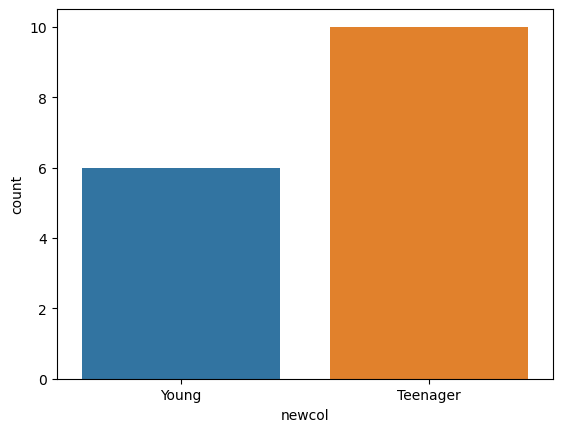

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.countplot(x=df['newcol'])
plt.show()

**Example:** Using a Lambda function with `map()`

In [22]:
df['age'].map(lambda x: "Adult" if x > 18 else "Child")

0     Adult
1     Child
2     Adult
3     Adult
4     Adult
5     Child
6     Child
7     Child
8     Child
9     Child
10    Child
11    Adult
12    Child
13    Adult
14    Child
15    Child
Name: age, dtype: object

**Example:** Using a Lambda Function with `map()`

In [23]:
# You cannot pass upper to map() as we have passed len to map() 
# as upper() is not a built-in function rather is a method of string class
#df['name'].map(upper)

In [24]:
df['name'].map(lambda x: x.upper())
# df.name.map(lambda x:x.lower())

0     EHTISHAM
1       AYESHA
2          ALI
3        AISHA
4        AHMED
5      KHADIJA
6         OMAR
7        ADEEN
8       ZAINAB
9       HASSAN
10     HUSSEIN
11      MUSKAN
12       YUSUF
13       AMINA
14     KHUBAIB
15         DUA
Name: name, dtype: object

**Example:** Passing a Dictionary {oldval:newval} to `map()` for changing selected values of a categorical column

In [25]:
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [26]:
df.session.unique() # df['session'].unique()

array(['MORNING', 'AFT', 'AFTERNOON', 'MOR'], dtype=object)

In [27]:
df.session.value_counts() 

session
AFT          5
AFTERNOON    5
MORNING      4
MOR          2
Name: count, dtype: int64

In [ ]:
# print(dir(df['session']))

In [28]:
df['session'].map({'MORNING':'M', 'AFTERNOON':'A'})

0       M
1     NaN
2       A
3     NaN
4     NaN
5       M
6     NaN
7       M
8     NaN
9       A
10    NaN
11      A
12      M
13      A
14    NaN
15      A
Name: session, dtype: object

In [29]:
df['session'].map({'MORNING':'M', 'AFTERNOON':'A', 'AFT':'F','MOR':'M'})

0     M
1     F
2     A
3     M
4     F
5     M
6     F
7     M
8     F
9     A
10    M
11    A
12    M
13    A
14    F
15    A
Name: session, dtype: object

>**Limitations of `map()` Method**
>- If there are values for which there is no match, the old values are changed and have become NaN. Solution is use `df.replace()` method
>- You can use it on an iterable or Series object not with entire dataframe. Solution is use `df.apply()` and `df.applymap()`

#### b. The `df.replace()` Method
- The `df.replace()` method is used to replace values given in `to_replace` with `value`
- The matching values in the entire dataframe are replaced with new values dynamically.
- This differs from updating with ``.loc`` or ``.iloc``, which require you to specify a location to update with some value.

```
df.replace(to_replace, value, inplace=False)
```

In [30]:
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [31]:
df['session'].replace({'MORNING':'M', 'AFTERNOON':'A'})

0       M
1     AFT
2       A
3     MOR
4     AFT
5       M
6     AFT
7       M
8     AFT
9       A
10    MOR
11      A
12      M
13      A
14    AFT
15      A
Name: session, dtype: object

>- Note that now there are no NaN values, rather the values that do not have a match remains as such
>- Another important point is `replace()` method works equally well with dataframe

In [32]:
# Calling replace on entire dataframe
df.replace({'MORNING':'M', 'AFTERNOON':'A', 'group A':'GROUP-A','Ehtisham':'Ehtisham Sadiq'}, inplace=True)

In [33]:
# Above operation is not inplace
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham Sadiq,23,Lahore,M,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,GROUP-A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,A,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,GROUP-A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,M,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,M,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,A,group D,Male,90.5,81.3,3800.0


#### c. The `df.apply()` Method
- The `df.apply()` method is used to run a function along the mentioned axis of the dataframe. 
- In simple words, `apply()` method runs a function on all the elements of a series of a dataframe

```
df.apply(func, axis=0, args)
```
- Where,
    - `func`: It can be a built-in, user-defined or a lambda function that is applied to every series of the dataframe as per the axis argument. (Objects passed to the func are series objects)
    - `axis`: The default value of axis argument is zero, so the func is applied to each column. If you want to apply the func to the values of a row, mention axis as one.
    - `args` : If you want to pass additional arguments to `func` in addition to the element of series, you can pass them as a tuple.

In [34]:
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


In [35]:
len("Ehtisham")

8

In [36]:
# Let us pass the built-in function `len()` and compute the length of each name under the name column of df
# So now the len() method is applied to all the values of a single column and return a series object
df['name'].apply(len)

0     8
1     6
2     3
3     5
4     5
5     7
6     4
7     5
8     6
9     6
10    7
11    6
12    5
13    5
14    7
15    3
Name: name, dtype: int64

In [37]:
# Let us pass a user-defined function, with an additional argument as well. This was not possible with map() method
def myfunc( age):
    if age < 18:
        return "Young"
    else:
        return "Old"

df['age'].apply(myfunc)

0       Old
1     Young
2       Old
3       Old
4       Old
5     Young
6     Young
7     Young
8       Old
9     Young
10    Young
11      Old
12      Old
13      Old
14    Young
15    Young
Name: age, dtype: object

In [38]:
# Let us use Lambda function to convert each name under the name column of df to upper case
df['name'].apply(lambda x : x.upper())

0     EHTISHAM
1       AYESHA
2          ALI
3        AISHA
4        AHMED
5      KHADIJA
6         OMAR
7        ADEEN
8       ZAINAB
9       HASSAN
10     HUSSEIN
11      MUSKAN
12       YUSUF
13       AMINA
14     KHUBAIB
15         DUA
Name: name, dtype: object

In [39]:
# If you are satisfied with the result, you may assign it to the specific column
df['name'] = df['name'].apply(lambda x : x.upper())

In [40]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,EHTISHAM,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,AYESHA,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,ALI,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,AISHA,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,AHMED,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,KHADIJA,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,OMAR,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,ADEEN,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,ZAINAB,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,HASSAN,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


**Question**: Can anyone guess what this LOC will do?

```df['subj1'] = df['subj1'].apply(lambda x : x+5)```

In [41]:
df['subj1'] = df['subj1'].apply(lambda x : x+5)

In [42]:
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,EHTISHAM,23,Lahore,MORNING,group C,Male,83.3,84.4,5000.0
1,2,AYESHA,16,Islamabad,AFT,group A,Male,75.5,60.5,6000.0
2,3,ALI,20,Karachi,AFTERNOON,group B,Female,69.9,75.1,8500.0
3,4,AISHA,20,Lahore,MOR,group A,Male,87.0,84.3,4000.0
4,5,AHMED,21,Peshawer,AFT,group D,Female,70.9,72.8,3500.0


#### b. The `df.applymap()` Method
- The `df.applymap()` method applies a function to datafreame element wise.

```
df.applymap(func, axis=0)
```
- Where,
    - `func`: A function that is passed a single value and returns a single value.
    
Note: A Series object do not have a `applymap()` method, so you cannot call it with a Series object

In [43]:
df = pd.read_csv('datasets/groupdata.csv')

In [44]:
df_string = df.loc[:,['name','address','session', 'group', 'gender']]
df_numeric = df.loc[:,['age','subj1','subj2','scholarship']]

In [45]:
df_numeric.head()

,age,subj1,subj2,scholarship
0,23,78.3,84.4,5000.0
1,16,70.5,60.5,6000.0
2,20,64.9,75.1,8500.0
3,20,82.0,84.3,4000.0
4,21,65.9,72.8,3500.0


In [46]:
df_string.head()

,name,address,session,group,gender
0,Ehtisham,Lahore,MORNING,group C,Male
1,Ayesha,Islamabad,AFT,group A,Male
2,Ali,Karachi,AFTERNOON,group B,Female
3,Aisha,Lahore,MOR,group A,Male
4,Ahmed,Peshawer,AFT,group D,Female


In [47]:
df_string.applymap(str.upper).head()

,name,address,session,group,gender
0,EHTISHAM,LAHORE,MORNING,GROUP C,MALE
1,AYESHA,ISLAMABAD,AFT,GROUP A,MALE
2,ALI,KARACHI,AFTERNOON,GROUP B,FEMALE
3,AISHA,LAHORE,MOR,GROUP A,MALE
4,AHMED,PESHAWER,AFT,GROUP D,FEMALE


In [48]:
# The applymap() method will apply the len function on each element of dataframe 
df_numeric.applymap(lambda x : x+5).head(5)

,age,subj1,subj2,scholarship
0,28,83.3,89.4,5005.0
1,21,75.5,65.5,6005.0
2,25,69.9,80.1,8505.0
3,25,87.0,89.3,4005.0
4,26,70.9,77.8,3505.0


### Bonus

In [49]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [50]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
# distribution of fare
df.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [52]:
df['fare'].dtype

dtype('float64')

In [53]:
def convert_fare_into_discrete_classes(value):
    if isinstance(value, float):
        if value <= 7.1904 and value >= 0.0:
            return "Low Fare"
        elif value <= 31.00 and value > 7.9104:
            return "Normal Fare"
        else:
            return "High Fare"
    else:
        return "Irrelevent Class"

In [54]:
df['fare'].apply(convert_fare_into_discrete_classes)

0        High Fare
1        High Fare
2      Normal Fare
3        High Fare
4      Normal Fare
          ...     
886    Normal Fare
887    Normal Fare
888    Normal Fare
889    Normal Fare
890      High Fare
Name: fare, Length: 891, dtype: object

In [55]:
df['fare'].apply(convert_fare_into_discrete_classes).value_counts()

fare
Normal Fare    446
High Fare      402
Low Fare        43
Name: count, dtype: int64

## 4. Add a New Column in a Dataframe
- To add a new column in a dataframe, create an appropriate series and then assign it to the dataframe
- Every time a new series is added to a dataframe, its name automatically becomes an attribute of that dataframe.
- It can be a series created from scratch, which can be numbersome if the dataframe has thousands of rows.
- Another common way to add a column is construct a series from the existing data within the dataframe
- Let us understand this with an example

In [2]:
# Recap
# Introduction to Python
# NumPy, Pandas(definition, features, data-structures, Series/DataFrame, Modification)

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv("datasets/groupdata.csv")

In [4]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


In [5]:
df.shape

(16, 10)

In [7]:
np.random.randint(50,95,16) # this returns numpy array

array([69, 55, 73, 67, 94, 77, 92, 50, 81, 85, 60, 88, 74, 65, 82, 58])

In [8]:
pd.Series(np.random.randint(50,95,16))

0     77
1     89
2     88
3     69
4     92
5     94
6     78
7     67
8     80
9     59
10    68
11    75
12    72
13    85
14    64
15    87
dtype: int64

In [9]:
# adding new column using pandas series method
df['subj3'] = pd.Series(np.random.randint(50,95,16))
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,subj3
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,75
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,89
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,79
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0,86
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0,94


In [10]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,subj3
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,75
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,89
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,79
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0,86
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0,94
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN,61
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0,50
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0,82
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0,52
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0,93


In [ ]:
# F20BINFT1M01157 -> Fall, year, BS, IT, 1, M, 

**Question:** Create a new Column name `Eligibility` from marks of all the subjects. If marks are greater than 70%, student will be `Eligibility` for scholarship.

In [13]:
df[['subj1', 'subj2', 'subj3']]

,subj1,subj2,subj3
0,78.3,84.4,75
1,70.5,60.5,89
2,64.9,75.1,79
3,82.0,84.3,86
4,65.9,72.8,94
5,69.3,78.6,61
6,90.2,NaN,50
7,84.1,76.0,82
8,90.5,81.3,52
9,90.5,81.3,93


In [12]:
df[['subj1', 'subj2', 'subj3']].sum()

subj1    1232.3
subj2    1172.0
subj3    1205.0
dtype: float64

In [14]:
df[['subj1', 'subj2', 'subj3']].sum(axis=1)

0     237.7
1     220.0
2     219.0
3     252.3
4     232.7
5     208.9
6     140.2
7     242.1
8     223.8
9     264.8
10    237.8
11    256.8
12    135.5
13    250.1
14    229.8
15    257.8
dtype: float64

In [15]:
df[['subj1', 'subj2', 'subj3']].sum(axis=1) / 300 

0     0.792333
1     0.733333
2     0.730000
3     0.841000
4     0.775667
5     0.696333
6     0.467333
7     0.807000
8     0.746000
9     0.882667
10    0.792667
11    0.856000
12    0.451667
13    0.833667
14    0.766000
15    0.859333
dtype: float64

In [16]:
(df[['subj1', 'subj2', 'subj3']].sum(axis=1) / 300 ) *100

0     79.233333
1     73.333333
2     73.000000
3     84.100000
4     77.566667
5     69.633333
6     46.733333
7     80.700000
8     74.600000
9     88.266667
10    79.266667
11    85.600000
12    45.166667
13    83.366667
14    76.600000
15    85.933333
dtype: float64

In [18]:
# (df[['subj1', 'subj2', 'subj3']].sum(axis=1) / 300)*100

In [19]:
((df[['subj1','subj2','subj3']].sum(axis=1)/300)*100) > 70

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
dtype: bool

In [20]:
# create a new column to find the students those are eligible for scholarship
df['Eligibility'] = ((df[['subj1','subj2','subj3']].sum(axis=1)/300)*100) > 70
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,subj3,Eligibility
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,75,True
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,89,True
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,79,True
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0,86,True
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0,94,True
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN,61,False
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0,50,False
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0,82,True
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0,52,True
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0,93,True


In [21]:
df.Eligibility = df.Eligibility.replace({True:'Eligible',False:'Not_Eligible'})


In [22]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,subj3,Eligibility
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,75,Eligible
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,89,Eligible
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,79,Eligible
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0,86,Eligible
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0,94,Eligible
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN,61,Not_Eligible
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0,50,Not_Eligible
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0,82,Eligible
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0,52,Eligible
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0,93,Eligible


In [23]:
df.Eligibility.value_counts()

Eligibility
Eligible        13
Not_Eligible     3
Name: count, dtype: int64

## 5. Delete an Existing Column from a Dataframe
- You can use any of the following ways to delete a column from a dataframe:
    - Use `del df['colname']`, which will remove the column, but will not return it
    - Use `df.pop('colname')` method which will remove that column as well as return the deleted column as a series
    - Use `df.drop()` is a better method than the above two. It can delete more than one columns and is not inplace. Moreover, it can be used to delete rows as well

####  Option 1: Using `del df['colname']`
- The `del df['colname']` will remove the column without returning it. It is inplace

In [24]:
del df['Eligibility']

In [25]:
df.columns

Index(['roll no', 'name', 'age', 'address', 'session', 'group', 'gender',
       'subj1', 'subj2', 'scholarship', 'subj3'],
      dtype='object')

#### Option 2: Using `df.pop('colname')`
- The `df.pop('colname')` method will remove the column and will return the Series that has been removed from the dataframe. It is inplace

In [26]:
df.pop('subj3')

0     75
1     89
2     79
3     86
4     94
5     61
6     50
7     82
8     52
9     93
10    66
11    85
12    59
13    90
14    58
15    86
Name: subj3, dtype: int64

In [27]:
df.columns

Index(['roll no', 'name', 'age', 'address', 'session', 'group', 'gender',
       'subj1', 'subj2', 'scholarship'],
      dtype='object')

####  Option 3: Using `df.drop()`
- The `df.drop()` method is used to remove one or more columns and will return a Series or Dataframe object accordingly.

```
df.drop(columns=[---],  axis=1, inplace=False)
```
- If you want to drop more than one columns, pass the names of columns to be deleted as a Python List to the `columns` parameter and to the `axis` argument pass 1. (`axis` argument specifies the direction of operation, which is left to right while deleting columns)
- By default it is not inplace. Most of Pandas methods that return a dataframe has an inplace paremeter with default value set to False. It means the operation will not effect the underlying change

In [28]:
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.head(3)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0


In [29]:
# drop just one column
df.drop(columns = 'name')

,roll no,age,address,session,group,gender,subj1,subj2,scholarship
0,1,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


In [30]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


In [31]:
# Remember axis is the direction of operation, and axis=1 is the column axis that goes from left to right
df.drop(columns=['name', 'age', 'address'], axis=1)

,roll no,session,group,gender,subj1,subj2,scholarship
0,1,MORNING,group C,Male,78.3,84.4,5000.0
1,2,AFT,group A,Male,70.5,60.5,6000.0
2,3,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,MOR,group A,Male,82.0,84.3,4000.0
4,5,AFT,group D,Female,65.9,72.8,3500.0
5,6,MORNING,group C,Female,69.3,78.6,NaN
6,7,AFT,group B,Female,90.2,NaN,4000.0
7,8,MORNING,group D,Male,84.1,76.0,8000.0
8,9,AFT,group C,Male,90.5,81.3,3500.0
9,10,AFTERNOON,group D,Male,90.5,81.3,3800.0


> It has just returned the resulting dataframe after removing the columns. No change has made to the original dataframe

Let us repeat the operation, with `inplace=True`. Note this time it will return None. However, changes has been made to the original dataframe 

In [32]:
df.drop(columns=['name', 'age', 'address'], axis=1, inplace=True)

In [33]:
df.head()

,roll no,session,group,gender,subj1,subj2,scholarship
0,1,MORNING,group C,Male,78.3,84.4,5000.0
1,2,AFT,group A,Male,70.5,60.5,6000.0
2,3,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,MOR,group A,Male,82.0,84.3,4000.0
4,5,AFT,group D,Female,65.9,72.8,3500.0


## 6. Add a New Row in  a Dataframe
- To add a new row in a dataframe, create an appropriate dataframe and then use `df.append()` method, which will return a new dataframe with the row added.
```
df.append(other, ignore_index=False)
```



In [34]:
import numpy as np
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.tail()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
11,12,Muskan,20,Karachi,AFTERNOON,group C,Male,90.5,81.3,NaN
12,13,Yusuf,18,Lahore,MORNING,group D,Male,NaN,76.5,7000.0
13,14,Amina,28,Multan,AFTERNOON,group A,Female,84.1,76.0,8000.0
14,15,Khubaib,13,Sialkot,AFT,group C,Female,90.5,81.3,3500.0
15,16,Dua,11,Multan,AFTERNOON,group A,Male,90.5,81.3,3800.0


In [35]:
# Let us create a new dataframe having a single row
newdf = pd.DataFrame(
     data = [[18, 'Suleman', 28, 'Lahore','AFT', 'group D', 'Male', 75.0, 65.0, 9999]],
     columns = ['roll no','name', 'age', 'address', 'session', 'group', 'gender','subj1', 'subj2', 'scholarship']
)
newdf

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,18,Suleman,28,Lahore,AFT,group D,Male,75.0,65.0,9999


In [36]:
df.append(newdf, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [38]:
pd.concat([df, newdf], ignore_index=True)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


In [39]:
# # Let us create a new dataframe having a single row
# newdf = pd.DataFrame(
#      data = [[18, 'Suleman', 28, 'Lahore','AFT', 'group D', 'Male', 75.0, 65.0]],
#      columns = ['roll no','name', 'age', 'address', 'session', 'group', 'gender','subj1', 'subj2']
# )
# newdf

> **Note:** The index associated with the only row in above dataframe is 0. Moreover, the sequence of columns is not same (name is coming before rollno)

In [40]:
# df = df.append(newdf, ignore_index=True )
# df.tail()

- Note that the due to `ignore_index=True` argument it has been assigned the next available index. Otherwise, the new row will also have row index 0.
- Moreover, note the NaN value under the scholarship column against the new added row
- One last thing, the `df.append()` method do not have `inplace` argument, so you always have to assign the resulting dataframe to the original `df`. 
- Please check this out as to why `df.drop()` has `inplace` argument, while **`df.append()` does not have `inplace` argument.**

## 8. Delete an Existing Row(s) from a Dataframe
- The `df.drop()` method is used to remove one or more rows (other than columns) and will return a Series or Dataframe object accordingly.

```
df.drop(index=[---],  axis=0, inplace=False)
```
- If you want to drop more than one rows, pass the row indices to be deleted as a Python List to the `index` parameter and to the `axis` argument pass 0. (`axis` argument specifies the direction of operation, which is top to bottom while deleting rows)
- By default it is not inplace. Most of Pandas methods that return a dataframe has an inplace paremeter with default value set to False. It means the operation will not effect the underlying change

In [41]:
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [42]:
df.loc[[2,4],:]

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [43]:
df.drop(index=[2,4], axis=0, inplace = True)

In [44]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0
10,11,Hussein,12,Islamabad,MOR,group B,Male,90.5,81.3,6000.0
11,12,Muskan,20,Karachi,AFTERNOON,group C,Male,90.5,81.3,NaN


In [47]:
# df.reset_index(drop=True)

## 8. Adding a New Column with Conditional Values

In [48]:
import pandas as pd
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


**Example:** Add a new column `total` that contains sum of marks in `subj1` and `subj2`. Then add a new column that should contain string `"Good"` if `total>150` other wise string `"Bad"`

In [49]:
df[['subj1','subj2']]

,subj1,subj2
0,78.3,84.4
1,70.5,60.5
2,64.9,75.1
3,82.0,84.3
4,65.9,72.8
5,69.3,78.6
6,90.2,NaN
7,84.1,76.0
8,90.5,81.3
9,90.5,81.3


In [50]:
# df['total'] = 
df['subj1'] + df['subj2']
# df['total']

0     162.7
1     131.0
2     140.0
3     166.3
4     138.7
5     147.9
6       NaN
7     160.1
8     171.8
9     171.8
10    171.8
11    171.8
12      NaN
13    160.1
14    171.8
15    171.8
dtype: float64

In [51]:
df['subj1'].add(df['subj2'], fill_value=0)

0     162.7
1     131.0
2     140.0
3     166.3
4     138.7
5     147.9
6      90.2
7     160.1
8     171.8
9     171.8
10    171.8
11    171.8
12     76.5
13    160.1
14    171.8
15    171.8
dtype: float64

In [52]:
df['total'] = df['subj1'].add(df['subj2'], fill_value=0)

In [53]:
df.sample(5)

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,total
15,16,Dua,11,Multan,AFTERNOON,group A,Male,90.5,81.3,3800.0,171.8
14,15,Khubaib,13,Sialkot,AFT,group C,Female,90.5,81.3,3500.0,171.8
11,12,Muskan,20,Karachi,AFTERNOON,group C,Male,90.5,81.3,NaN,171.8
12,13,Yusuf,18,Lahore,MORNING,group D,Male,NaN,76.5,7000.0,76.5
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0,90.2


In [54]:
def add_status(value):
    if value>150:
        return "Good"
    else:
        return "Bad"
df['total'].apply(add_status)

0     Good
1      Bad
2      Bad
3     Good
4      Bad
5      Bad
6      Bad
7     Good
8     Good
9     Good
10    Good
11    Good
12     Bad
13    Good
14    Good
15    Good
Name: total, dtype: object

In [55]:
df['status'] =  df['total'].apply(add_status)

In [56]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship,total,status
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0,162.7,Good
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0,131.0,Bad
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0,140.0,Bad
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0,166.3,Good
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0,138.7,Bad
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN,147.9,Bad
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0,90.2,Bad
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0,160.1,Good
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0,171.8,Good
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0,171.8,Good


> Try: Using Lambda Function

## 9. Deleting Row(s) Based on Specific Condition

In [57]:
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [58]:
df['session'] == 'AFT'

0     False
1      True
2     False
3     False
4      True
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
Name: session, dtype: bool

In [59]:
df[df['session'] == 'AFT']

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
14,15,Khubaib,13,Sialkot,AFT,group C,Female,90.5,81.3,3500.0


In [60]:
df[df['session'] == 'AFT'].index

Index([1, 4, 6, 8, 14], dtype='int64')

In [61]:
# Let us drop an entire row from the data frame, in which session is 'AFT'
# Get the indices where session == 'AFT' using the .index function
indices = df[df['session'] == 'AFT'].index
indices

Index([1, 4, 6, 8, 14], dtype='int64')

In [62]:
df.drop(index=indices, inplace=True)

In [63]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0
10,11,Hussein,12,Islamabad,MOR,group B,Male,90.5,81.3,6000.0
11,12,Muskan,20,Karachi,AFTERNOON,group C,Male,90.5,81.3,NaN
12,13,Yusuf,18,Lahore,MORNING,group D,Male,NaN,76.5,7000.0
13,14,Amina,28,Multan,AFTERNOON,group A,Female,84.1,76.0,8000.0


In [ ]:
# Complete Code
df.drop(index = df[df['session']=='AFT'].index, inplace=True)
df

## 10. Delete a Column  Based on Specific Condition

In [64]:
df = pd.read_csv('datasets/groupdata.csv')
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3,3800.0


**Example:** Let us drop the column(s) from above data frame, if it has >= than 2 NaN values.

In [65]:
# 35% missing value -> drop
df.isna().sum()

roll no        0
name           0
age            0
address        0
session        0
group          0
gender         0
subj1          1
subj2          1
scholarship    2
dtype: int64

In [66]:
df.isna().sum() >= 2

roll no        False
name           False
age            False
address        False
session        False
group          False
gender         False
subj1          False
subj2          False
scholarship     True
dtype: bool

In [67]:
df.columns[df.isna().sum() >= 2]

Index(['scholarship'], dtype='object')

In [68]:
col_indices = df.columns[df.isna().sum() >= 2]
col_indices

Index(['scholarship'], dtype='object')

In [69]:
df.drop(columns = col_indices, inplace=True)

In [70]:
df

,roll no,name,age,address,session,group,gender,subj1,subj2
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8
5,6,Khadija,16,Lahore,MORNING,group C,Female,69.3,78.6
6,7,Omar,12,Sialkot,AFT,group B,Female,90.2,NaN
7,8,Adeen,4,Multan,MORNING,group D,Male,84.1,76.0
8,9,Zainab,18,Karachi,AFT,group C,Male,90.5,81.3
9,10,Hassan,15,Lahore,AFTERNOON,group D,Male,90.5,81.3


> Try: Drop all the columns where missing values are greater and equal to 1 using lambda function.

## 11. Change Datatype of a Pandas Series
- Use the `astype(dtype)` method to cast a pandas object to a specified dtype ``dtype``.

#### a. Changing Datatype from `int64` to `float64`

In [71]:
df = pd.read_csv('datasets/groupdata.csv')
df.dtypes

roll no          int64
name            object
age              int64
address         object
session         object
group           object
gender          object
subj1          float64
subj2          float64
scholarship    float64
dtype: object

In [72]:
#Suppose we want to change the datatype of `age` column to float64 dtype
df['age'] = df['age'].astype(float)
df.dtypes

roll no          int64
name            object
age            float64
address         object
session         object
group           object
gender          object
subj1          float64
subj2          float64
scholarship    float64
dtype: object

In [73]:
# convert a string into int if a string is only numeric.
str1 = "1223"
int(str1)

1223

In [74]:
str1 = "ab23"
int(str1)

ValueError: invalid literal for int() with base 10: 'ab23'

#### b. Changing Datatype from `string` to `boolean`.

In [75]:
df = pd.read_csv('datasets/groupdata.csv')
df.head()

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,Male,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,Male,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,Female,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,Male,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,Female,65.9,72.8,3500.0


In [76]:
df.gender.str.contains('Male')

0      True
1      True
2     False
3      True
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
15     True
Name: gender, dtype: bool

In [77]:
df['gender'] = df.gender.str.contains('Male').astype(int)
df

,roll no,name,age,address,session,group,gender,subj1,subj2,scholarship
0,1,Ehtisham,23,Lahore,MORNING,group C,1,78.3,84.4,5000.0
1,2,Ayesha,16,Islamabad,AFT,group A,1,70.5,60.5,6000.0
2,3,Ali,20,Karachi,AFTERNOON,group B,0,64.9,75.1,8500.0
3,4,Aisha,20,Lahore,MOR,group A,1,82.0,84.3,4000.0
4,5,Ahmed,21,Peshawer,AFT,group D,0,65.9,72.8,3500.0
5,6,Khadija,16,Lahore,MORNING,group C,0,69.3,78.6,NaN
6,7,Omar,12,Sialkot,AFT,group B,0,90.2,NaN,4000.0
7,8,Adeen,4,Multan,MORNING,group D,1,84.1,76.0,8000.0
8,9,Zainab,18,Karachi,AFT,group C,1,90.5,81.3,3500.0
9,10,Hassan,15,Lahore,AFTERNOON,group D,1,90.5,81.3,3800.0


## 12. Sorting dataframes using `df.sort_values()`

>Pandas data frame has two useful functions. **`df.sort_values()`** to sort by values of one or more columns and **`df.sort_index()`** to sort by the index. Each of these functions come with numerous options, like sorting in specific order (ascending or descending), sorting in place, sorting with missing values, sorting by specific algorithm etc.
- The `df.sort_values()` function sort by the values along either axis.
```
df.sort_values(by,axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last',ignore_index=False)
```
Where,
-  `by`: str or list of str to sort
-  `axis`: If `axis` is 0 or 'index' then 'by' may contain index levels and/or column labels. If `axis` is 1 or 'columns' then 'by' may contain column levels and/or index labels.
- `ascending`: if True then ascending and if False then descending
- `inplace`:  If True, perform operation in-place.
- `kind`: {'quicksort', 'mergesort', 'heapsort', 'stable'}, default 'quicksort'. This option is only applied when sorting on a single column or label.
- `na_position`: If first then puts NaNs at the beginning. Default is last
- `ignore_index`: If True, the resulting axis will be labeled 0, 1, …, n - 1. Default False

In [ ]:
import pandas as pd

data = {
    'roll_no': [ 102, 101, 104, 103, 105],
    'name' : ['Ehtisham', 'Ayesha', 'Ali', 'Khubaib', 'Dua'],
    'gender' : ['M', 'F', 'M', 'M', 'F'],
    'grade'  : ['A', 'A', 'B', 'B', 'A'],
    'marks'  : [ 21,  23,  12,  14,  20],
    'city' : ['Lahore', 'Okara', 'Lahore', 'Karachi', 'Okara']
}

df = pd.DataFrame(data=data)
df

#### a. Sorting by Single Column

In [ ]:
# Let us sort the data by grade column
# By default the sorting is done in ascending order and is not inplace
df1 = df.sort_values(by=['grade'])
df1

- Note in above output, we have sorted the data based on the `grade` column. You can observe that some of the students with higher marks are ranked lower.
- We want to sort the data based on both grades and marks.

#### b. Sorting by Multiple Columns

In [ ]:
# sort the dataframe
df2 = df.sort_values(by=['grade','marks'])
df2

- Note that the data is first sorted by grade, and then within grade it is sorted by marks
- But still the problem is not solved. Actually we want to sort by grade in ascending order and by marks in descending order.


In [ ]:
df3 = df.sort_values(by=['grade','marks'], ascending=[True,False])
df3

#### c. Role of NaN Values in Sorting

In [ ]:
df = pd.read_csv('datasets/groupdata.csv')
df

In [ ]:
# If there is a missing value NaN, by default it is listed at the end when using sort_values function
# Regardless of the sorting order (Ascending or Descending)
df.sort_values(by='scholarship')

In [ ]:
# If the argument na_position='first', it will be listed at the top.
df.sort_values(by=['scholarship'], na_position='first')

>- Checkout the `df.nlargest()` method which return the first `n` rows ordered by `columns` in descending order.
>- Checkout the `df.nsmallest()` method which return the first `n` rows ordered by `columns` in ascending order.

In [ ]:
df.nsmallest(3, 'scholarship')

In [ ]:
df.nlargest(3, 'scholarship')

In [ ]:
# df.sort_values(by=['scholarship'], na_position='first', ascending=False)
# df.nlargest(3, 'scholarship')
# df.nsmallest(3, 'scholarship')

## 13. Sorting dataframes using `df.sort_index()`
> We have observed while using `df.sort_values()`, by default the sorting is performed in the vertical direction. If you want to sort in the row direction, we can set the`axis` argument of  `df.sort_values()` method to 1, which is by default set to zero. However, it may cause problems when a number and a string are mixed

- So to sort a dataframe in the horizontal direction, we normally use **`df.sort_index()`** method.
```
df.sort_index(axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last',ignore_index=False)
```
Where,
-  `axis`: The axis along which to sort. The value 0 identifies the rows, and 1 identifies the columns. (default is 0)
- `ascending`: If True then ascending and If False then descending
- `inplace`:  If True, perform operation in-place.
- `kind`: {'quicksort', 'mergesort', 'heapsort', 'stable'}, default 'quicksort'. This option is only applied when sorting on a single column or label.
- `na_position`: If first then puts NaNs at the beginning. Default is last
- `ignore_index`: If True, the resulting axis will be labeled 0, 1, …, n - 1. Default False

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'roll_no': [ 102, 101, 104, 103, 105],
    'name' : ['Ehtisham', 'Ayesha', 'Ali', 'Khubaib', 'Dua'],
    'gender' : ['M', 'F', 'M', 'M', 'F'],
    'grade'  : ['A', 'A', 'B', 'B', 'A'],
    'marks'  : [ 21,  23,  12,  14,  20],
    'city' : ['Lahore', 'Okara', 'Lahore', 'Karachi', 'Okara']
})
df

#### a. Sort by Column Labels
- By passing the axis argument with a value 0 or 1, the sorting can be done on the column labels. By default, axis=0

In [ ]:
df1 = df.sort_index(axis=1)
df1

#### b. Sort by Index
- The first question that might come in your mind, is that why do we need to sort by index. We can see in above dataframe the row indices are in numeric order. And if the row indices are disturbed due to may be sorting by the values of some column, we can use `reset_index()` method to make the row indices again in increasing numeric order.
<br><br>
- To understand this, let us follow following three steps:
    - Set the `roll_no` column as index
    - Call `sort_index()` with axis=0
    - Call `reset_index()`

In [ ]:
# Lets us set the roll_no column as index
df1 = df.set_index(["roll_no"])
df1

> Note that the implicit index collumn is dropped and the roll_no column has become the index of this dataframe.

In [ ]:
# sort the datframe by index 
df2 = df1.sort_index(axis=0)
df2

In [ ]:
# After sort you can reset the index if you want
df3 = df2.reset_index(drop=False)
df3

## Practice Questions Part 1: 
- Step 1. Import the necessary libraries.
- Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/ehtisham-sadiq/P0Q6R9S2-MLZone/main/Module%2004%20-%20Python%20for%20Data%20Scientists/datasets/u.user)
- Step 3. Assign it to a variable called users and use the `user_id` as index
- Step 4. See the first 25 entries
- Step 5. See the last 10 entries
- Step 6. What is the number of observations in the dataset?
- Step 7. What is the number of columns in the dataset?
- Step 8. Print the name of all the columns.
- Step 9. How is the dataset indexed?
- Step 10. What is the data type of each column?
- Step 11. Print only the occupation column
- Step 12. How many different occupations are in this dataset?
- Step 13. What is the most frequent occupation?
- Step 14. Summarize the DataFrame.
- Step 15. Summarize all the columns
- Step 16. Summarize only the occupation column
- Step 17. What is the mean age of users?
- Step 18. What is the age with least occurrence?

In [ ]:
url = "https://raw.githubusercontent.com/ehtisham-sadiq/P0Q6R9S2-MLZone/main/Module%2004%20-%20Python%20for%20Data%20Scientists/datasets/u.user"

In [ ]:
# step 01: import all necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# step 02: read the dataset
users = pd.read_csv(url, sep="|")
users.head()

In [ ]:
users.set_index('user_id', inplace=True)

In [ ]:
users.head()

In [ ]:
# step 4: See first 25 records
users.head(25)

In [ ]:
# step 5: See last 10 records
users.tail(10)

In [ ]:
# step 6: How many records are there?
users.shape

In [ ]:
# step 8: print the name of columns
users.columns

In [ ]:
# step 9: index of dataset
users.index

In [ ]:
# what is the datatype of each column
users.dtypes

In [ ]:
# print only occupation column
users['occupation']

In [ ]:
# - Step 12. How many different occupations are in this dataset?
# - Step 13. What is the most frequent occupation?
# - Step 14. Summarize the DataFrame.
# - Step 15. Summarize all the columns
# - Step 16. Summarize only the occupation column
# - Step 17. What is the mean age of users?
# - Step 18. What is the age with least occurrence?
users['occupation'].unique()

In [ ]:
users['occupation'].value_counts().head(1)

In [ ]:
users.describe(include='all')

In [ ]:
users['occupation'].describe()

In [ ]:
users['age'].mean()

In [ ]:
users['age'].value_counts().tail(1)

In [ ]:
# import pandas as pd
# pd.Series([])
# pd.DataFrame(dict)
# shape
# info() -> indcies of columns, columns name, total null values, datatype of each column, range of indcies
# dtypes -> return datatype of all columns
# describe() -> descriptive view dataset/dataframe (mean, max, min, std, count)
# head() -> top records/rows/indcies
# tail() -> last 5 records
# unique()  -> all unique values in given column(it is invalid for continous data)
# nunique() -> return count of unique values
# value_counts() -> return unique values along with their frequency

In [1]:
from IPython.core.display import HTML

style = """
    <style>
        body {
            background-color: #f2fff2;
        }
        h1 {
            text-align: center;
            font-weight: bold;
            font-size: 36px;
            color: #4295F4;
            text-decoration: underline;
            padding-top: 15px;
        }
        
        h2 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #4A000A;
            text-decoration: underline;
            padding-top: 10px;
        }
        
        h3 {
            text-align: left;
            font-weight: bold;
            font-size: 30px;
            color: #f0081e;
            text-decoration: underline;
            padding-top: 5px;
        }

        
        p {
            text-align: center;
            font-size: 12 px;
            color: #0B9923;
        }
    </style>
"""

html_content = """
<h1>Hello</h1>
<p>Hello World</p>
<h2> Hello</h2>
<h3> World </h3>
"""

HTML(style + html_content)